# Homework 07: Linear Discriminant Analysisn
## Batuhan Yalçın
### May 6, 2022

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.linalg as linalg
from scipy import stats
from scipy.spatial import distance
import pandas as pd
#from sklearn.metrics import confusion_matrix

## Importing Data

## Step 1

In [2]:
# read data into memory
images_data = np.genfromtxt("hw07_data_set_images.csv", delimiter = ",")
labels_data = np.genfromtxt("hw07_data_set_labels.csv", delimiter = ",")

## Step 2

In [3]:
train_images = images_data[:2000,:]
test_images = images_data[2000:,:]
train_label = labels_data[:2000]
test_label = labels_data[2000:]

# get x and y values
x_train = train_images
y_train = train_label.astype(int)

x_test = test_images
y_test = test_label.astype(int)

# get number of classes, number of samples, and number of features
K = int(np.max(train_label))
#N = x_train.shape[0]
D = x_train.shape[1]

# get numbers of train and test samples
N_train = len(y_train)
N_test = len(y_test)


## STEP 3

## Calculate Sw and SB

In [4]:
sample_means = [np.mean(x_train[y_train==(c + 1)], axis = 0) for c in range(K)]
point_mean = np.mean(sample_means,axis=0)
np.shape(sample_means)
mean_overall = np.mean(x_train, axis=0)

SW = np.zeros((784,784))
SB = np.zeros((784, 784))
class_labels = np.unique(y_train)

for c in class_labels:
    X_c = x_train[y_train == c]
    mean_c = np.mean(X_c, axis=0)
    
    SW += (X_c-mean_c).T.dot((X_c-mean_c))
    
    n_c = X_c.shape[0]
    mean_diff = (mean_c - mean_overall).reshape(784, 1)
    SB += n_c * (mean_diff).dot(mean_diff.T)
    
print("print(SW[0:5, 0:5])")
print("print(SB[0:5, 0:5])")    
print(SW[0:5, 0:5])
print(SB[0:5, 0:5])

print(SW[0:5, 0:5])
print(SB[0:5, 0:5])
[[  195.0531401    138.98550725   138.24154589   273.64251208
    184.90821256]
 [  138.98550725   146.68407152   137.97108222   212.80522823
    144.25612894]
 [  138.24154589   137.97108222   237.79940915   222.04558827
    157.47422967]
 [  273.64251208   212.80522823   222.04558827 10381.73114607
   8779.022599  ]
 [  184.90821256   144.25612894   157.47422967  8779.022599
  21507.10414962]]
[[  0.8488599    0.86049275   1.26145411   4.64248792   7.89978744]
 [  0.86049275   1.07392848   2.24791778   8.49977177  10.72787106]
 [  1.26145411   2.24791778   6.68009085  25.25691173  26.33777033]
 [  4.64248792   8.49977177  25.25691173  97.25635393  94.117401  ]
 [  7.89978744  10.72787106  26.33777033  94.117401   144.92785038]]


## STEP 4

## Calculate the largest nine eigenvalues

## Principal Component Analysis

In [5]:
SWSB_Matrix = np.linalg.inv(SW).dot(SB)
# Get eigenvalues and eigenvectors of SW^-1 * SB
eigenvalues, eigenvectors = np.linalg.eig(SWSB_Matrix)
eigenvectors = eigenvectors.T


# sort eigenvalues largest to smallest
idxs = np.argsort(abs(eigenvalues))[::-1]
eigenvectors = eigenvectors[idxs]
vectors = np.real(eigenvectors)

#Get largest eigenvalues
eigenvalues = eigenvalues[idxs]
values = np.real(eigenvalues)


print("\nprint(values[0:9])")
print(values[0:9])
## Principal Component Analysis


print(values[0:9])
[26.03085646 11.57909822  7.86259994  5.12082313  3.60002676  3.22503144
  2.71288241  1.3688596   1.13340931]


## STEP 5

## Plotting

In [6]:
# get two eigenvectors that correspond to the largest two eigenvalues
linear_discriminants = eigenvectors[0 : 2]
# calculate two-dimensional projections for train
X_projected = np.dot(x_train, linear_discriminants.T)

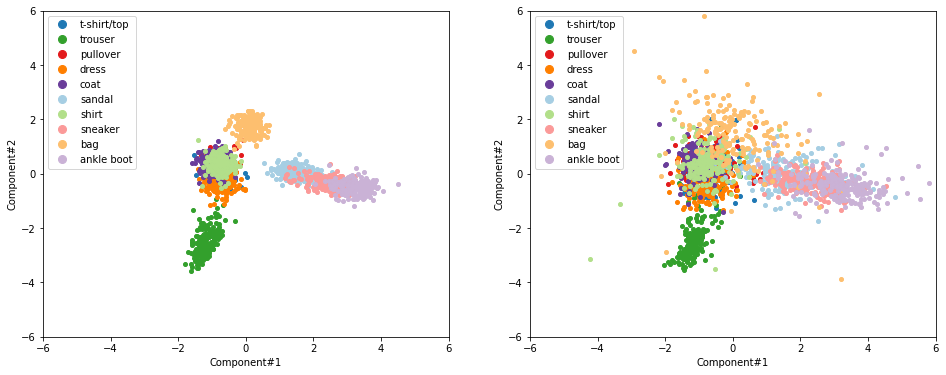

In [7]:
# plot two-dimensional projections using lab taslak
Z = np.real(X_projected)

# plot two-dimensional projections
plt.subplots(figsize=(16,6))
plt.subplot(1, 2, 1)
point_colors = np.array(["#1f78b4", "#33a02c", "#e31a1c", "#ff7f00", "#6a3d9a", "#a6cee3", "#b2df8a", "#fb9a99", "#fdbf6f", "#cab2d6"])
for c in range(K):
    plt.plot(Z[y_train == c + 1, 0], Z[y_train == c + 1, 1], marker = "o", markersize = 4, linestyle = "none", color = point_colors[c])
plt.legend(["t-shirt/top", "trouser", "pullover", "dress", "coat", "sandal", "shirt", "sneaker", 
"bag", "ankle boot"],
           loc = "upper left", markerscale = 2)
plt.xlabel("Component#1")
plt.ylabel("Component#2")
plt.xlim(-6, 6)
plt.ylim(-6, 6)

# calculate two-dimensional projections for test
X_projected_test = np.dot(x_test, linear_discriminants.T)
Z_test = np.real(X_projected_test)

plt.subplot(1, 2, 2)
for c in range(K):
    plt.plot(Z_test[y_test == c + 1, 0], Z_test[y_test == c + 1, 1], marker = "o", markersize = 4, linestyle = "none", color = point_colors[c])
plt.legend(["t-shirt/top", "trouser", "pullover", "dress", "coat", "sandal", "shirt", "sneaker", 
"bag", "ankle boot"],
           loc = "upper left", markerscale = 2)
plt.xlabel("Component#1")
plt.ylabel("Component#2")
plt.xlim(-6, 6)
plt.ylim(-6, 6)

plt.show()


## STEP 6

In [8]:
## Project of the training and test data points in a 9-dimensional subspace
linear_discriminants_9 = eigenvectors[0 : 9]
X_projected_9 = np.dot(x_train, linear_discriminants_9.T)
Z_9 = np.real(X_projected_9)
X_projected_test_9 = np.dot(x_test, linear_discriminants_9.T)
Z_test_9 = np.real(X_projected_test_9)## STEP 5## STEP 6


## Slower solver

In [9]:
#Slover solver using own implemntation of KNN
def KNN_algorithm(X1_set,X2_set,N_train,K):
    Y_hat = []
    for i in range(N_train):
        test_set = X1_set[i,:]
        initial_distances = np.zeros(X2_set.shape[0])
        for j in range(N_train):
            initial_distances[j] = distance.euclidean(test_set, X2_set[j, :])
        smallest_dists_indices = np.argsort(initial_distances)[:K]
        
        temp_classes = []
        for k in smallest_dists_indices:
            temp_classes.append(y_train[k])
        prediction= stats.mode(temp_classes)[0]
        Y_hat.append(prediction)
        
    return Y_hat

## Training Performance

In [10]:
print("print(confusion_matrix_test)")
y_hat_train_predict = KNN_algorithm(Z_9,Z_9,N_train,11)
confusion_matrix_train = pd.crosstab(np.reshape(y_hat_train_predict, N_train), y_train,
                               rownames = ["y_hat"], colnames = ["y_train"])
print(confusion_matrix_train)

y_hat_test = KNN_algorithm(Z_test_9,Z_9,N_train,11)
confusion_matrix_test = pd.crosstab(np.reshape(y_hat_test, N_train), y_test,
                               rownames = ["y_hat"], colnames = ["y_test"])
print("print(confusion_matrix_test)")
print(confusion_matrix_test)



Slower Solution using my own implemntation of KNN classifier
print(confusion_matrix_test)
y_train   1    2    3    4    5    6    7    8    9    10
y_hat                                                    
1        203    0    1    1    0    0   15    0    0    0
2          0  192    0    1    0    0    0    0    0    0
3          0    0  198    0    3    0   11    0    0    0
4          2    2    1  202    3    0    4    0    0    0
5          0    0    8    1  201    0    9    0    0    0
6          0    0    0    0    0  175    0    3    0    0
7          9    0    2    6   11    0  168    0    1    0
8          0    0    0    0    0    3    0  196    0    1
9          0    0    0    0    0    0    0    0  183    0
10         0    0    0    0    0    0    0    0    0  184
print(confusion_matrix_test)
y_test   1    2    3    4    5    6   7    8    9    10
y_hat                                                  
1       142    1   21    7    1    2  42    0    6    2
2         0  18